In [841]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from scripts.keyword_based_classification import get_topics_list
import os
import datetime as dt
import numpy as np


In [842]:
topics = get_topics_list()
topics = ['trybunał konstytucyjny',
 'opozycja',
 'współpraca z Unią Europejską',
 'rząd pis (prawo i sprawiedliwość)',
 'publiczna opieka zdrowotna (nfz)',
 'niezależność sądów (sądownictwo)',
 'osoby z niepełnosprawnościami',
 'prawa kobiet',
 'dotacje dla rolników',
 'odnawialne źródła energii',
 'wzmocnienie wojska polskiego',
 'podwyższenie wieku emerytalnego',
 'program 500 plus',
 'węgiel',
 'edukacja seksualna (wdż)',
 'ustawa o ograniczeniu biurokracji i barier prawnych',
 'inflacja',
 'prowadzenie działalności gospodarczej',
 'ZUS',
 'zmiany klimatyczne',
 'telewizja publiczna (tvp)',
 'przyjmowanie imigrantów',
 'aborcja',
 'szczepienia',
 'rozdział kościoła od państwa']

In [843]:
data = pd.read_pickle('dane/done/sejm_senat_chat_top_topics.pkl')
data

,author,date,text_all,place,TextBlob_Polarity,TextBlob_Subjectivity,sentiment_herbert,openai_result,text_part,sentiment,topic
102,senior antoni macierewicz,2019-11-12,czy ktoś z obecnych pań i panów posłów nie zło...,sejm,0.0,0.0,0,{'text': 'czy ktoś z obecnych pań i panów posł...,czy ktoś z obecnych pań i panów posłów nie zło...,neutral,trybunał konstytucyjny
103,senior antoni macierewicz,2019-11-12,czy ktoś z obecnych pań i panów posłów nie zło...,sejm,0.0,0.0,0,"{'text': 'nikt się nie zgłasza.', 'topic': 'tr...",nikt się nie zgłasza.,neutral,trybunał konstytucyjny
104,senior antoni macierewicz,2019-11-12,czy ktoś z obecnych pań i panów posłów nie zło...,sejm,0.0,0.0,0,"{'text': 'stwierdzam, że wszyscy posłowie obec...","stwierdzam, że wszyscy posłowie obecni w tej c...",neutral,trybunał konstytucyjny
105,senior antoni macierewicz,2019-11-12,czy ktoś z obecnych pań i panów posłów nie zło...,sejm,0.0,0.0,0,"{'text': 'panie i panowie posłowie!', 'topic':...",panie i panowie posłowie!,neutral,trybunał konstytucyjny
106,senior antoni macierewicz,2019-11-12,czy ktoś z obecnych pań i panów posłów nie zło...,sejm,0.0,0.0,0,{'text': 'za chwilę zarządzę przerwę w obradac...,za chwilę zarządzę przerwę w obradach.,neutral,trybunał konstytucyjny
...,...,...,...,...,...,...,...,...,...,...,...
27180,małgorzata gosiewska,2020-05-07,"dziękuję bardzo, panie pośle. w imieniu koła k...",sejm,0.0,0.0,1,"{'text': 'pan poseł krystian kamiński', 'topic...",pan poseł krystian kamiński,neutral,opozycja
27182,małgorzata gosiewska,2020-05-07,"dziękuję bardzo, panie pośle. na tym zakończyl...",sejm,0.0,0.0,1,"{'text': 'dziękuję bardzo, panie pośle. na tym...","dziękuję bardzo, panie pośle. na tym zakończyl...",neutral,opozycja
27183,janusz korwin-mikke,2020-05-07,"pani marszałek! wysoka izbo! przepraszam, zada...",sejm,0.0,0.0,1,{'text': 'średni iloraz inteligencji aborygenó...,średni iloraz inteligencji aborygenów australi...,negative,prawa kobiet
27201,małgorzata gosiewska,2020-05-07,"dziękuję bardzo, panie pośle. pan poseł piotr ...",sejm,0.0,0.0,1,"{'text': 'pan poseł piotr borys, koalicja obyw...","pan poseł piotr borys, koalicja obywatelska.",neutral,opozycja


In [844]:
data['TextBlob_Subjectivity'].describe()

count    12477.000000
mean         0.040426
std          0.124764
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: TextBlob_Subjectivity, dtype: float64

In [845]:
data[data['TextBlob_Subjectivity'] > 0].shape

(1963, 11)

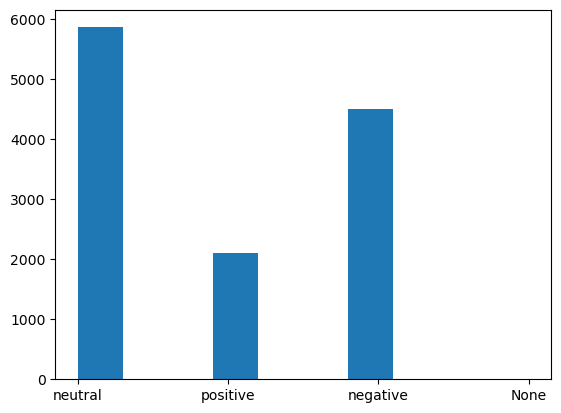

In [846]:
plt.hist(list(data['sentiment'].values))
plt.show()

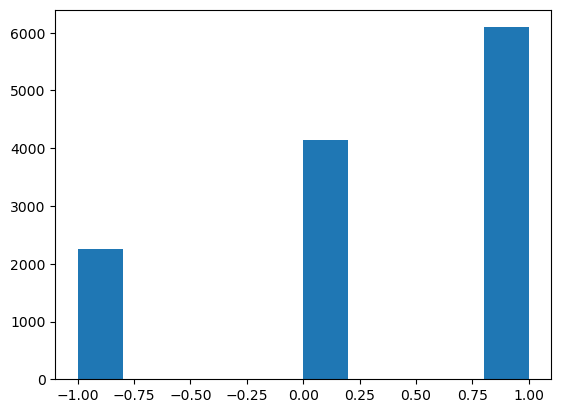

In [847]:
plt.hist(list(data['sentiment_herbert'].values))
plt.show()

---

## Funkcje 

In [848]:
def stance_detection(file_name:str,
                     weighted:bool = False,
                     sentiment_herbert_weight:float = 0.8,
                     sentiment_column_name:str = 'sentiment'):
    
    data = pd.read_pickle(f'dane/done/{file_name}.pkl')
    data = data[data['topic'].isin(topics)]
    
    
    if 'author' not in data.columns:
        data.rename(columns={'username': 'author'}, inplace=True)
        print(data.columns)
    
    if weighted:
        data[sentiment_column_name] = data[sentiment_column_name].replace({'neutral': 0,
                                                                            'positive': 1,
                                                                            'negative': -1,
                                                                            })

    for i, row in data.iterrows():
        sentiment_herbert = row['sentiment_herbert']
        if weighted:
            if type(row[sentiment_column_name]) == int:  
                sentiment_chat = row[sentiment_column_name]  
            else:
                sentiment_herbert_weight = 1
                sentiment_chat = 0
            sentiment = sentiment_herbert_weight * sentiment_herbert + (1-sentiment_herbert_weight) * sentiment_chat
        else:
            sentiment = sentiment_herbert
        data.at[i, 'stance'] = row['TextBlob_Subjectivity'] * sentiment 
        
    data['diff_max_min_stance'] = data.groupby(by=['author', 'topic'])['stance'].transform(lambda x: x.max() - x.min())
    data['stance_changed'] = data.groupby(by=['author', 'topic'])['stance'].transform(lambda x: x.max() > 0 and x.min() < 0)

    return data

In [849]:
def counting_stance_change(df, title, col_to_group_by='topic'):
    count_by_topic = df.groupby(col_to_group_by)['date'].count().reset_index(name='count').sort_values('count', ascending=False) 

    fig = px.bar(count_by_topic, x='count', y=col_to_group_by, 
                 labels={'author': 'Polityk', 'count': 'Częstość zmian nastawienia', 'topic': 'Temat'},
                 title=title, width=800, height=800)
    
    return count_by_topic, fig

In [917]:
def stance_analysis(file:str,
                    weighted: bool = False,
                    sentiment_herbert_weight: float = 0.8,
                    sentiment_column_name: str = 'sentiment',
                    stance_detected:bool = False
                    ):
    
    if not stance_detected:
        data = stance_detection(file,
                            weighted,
                            sentiment_herbert_weight,
                            sentiment_column_name)
    else:
        data = pd.read_pickle(f'dane/done/{file}.pkl')
        data = data[data['topic'].isin(topics)]
    
    data_with_changed_stance = data[data['stance_changed'] == True].sort_values(['date', 'diff_max_min_stance'], ascending=[True, False])
    data_with_no_changed_stance = data[data['diff_max_min_stance'] == 0].sort_values(['date', 'diff_max_min_stance'], ascending=[True, False])

    authors_with_changed_stance = data_with_changed_stance['author'].unique()
    topics_with_changed_stance = data_with_changed_stance['topic'].unique()

    print(f'Liczba tematów, w których wystąpiła zmienność nastawienia: {len(topics_with_changed_stance)}')
    print(f'Liczba autorów, którzy zmienili nastawienie do tematu: {len(authors_with_changed_stance)}')
    
    display(data['stance'].describe())
    
    count_by_topic, fig = counting_stance_change(data_with_changed_stance, 'W jakich tematach najczęściej zmieniano nastawienie?')
    fig.show()
    display(count_by_topic.head())
    
    count_by_author, fig = counting_stance_change(data_with_changed_stance, 'Kto najczęściej zmienia nastawienie?', 'author')
    fig.show()
    display(count_by_author.head())
    
    count_by_topic_no_change, _ = counting_stance_change(data_with_no_changed_stance, 'W jakich tematach występuje stałość opinii?')
    display(count_by_topic_no_change.head())
    
    return data, data_with_changed_stance, data_with_no_changed_stance
    

In [918]:
def topic_analysis(data:pd.DataFrame,
                   if_sejm:bool = True,
                   activity_lim:int = 20):
    
    data = data[data['topic'].isin(topics)]
    
    if 'author' not in data.columns:
        data.rename(columns={'username': 'author'}, inplace=True)

    data_topic_grouped = data.groupby(['author', 'topic'])['date'].count().reset_index(name='count').sort_values('count', ascending=False) 
    
    data_topics_per_author = data.drop_duplicates(subset=['author', 'topic'])
    data_topics_per_author = data_topics_per_author.groupby(['author'])['topic'].count().reset_index(name='count_topics').sort_values('count_topics', ascending=False) 
    top_active_authors = data_topics_per_author[data_topics_per_author['count_topics'] >= activity_lim]
    
    display(top_active_authors)
    
    place = 'w sejmie' if if_sejm else 'na twitterze'

    fig = px.bar(top_active_authors, x='author', y='count_topics', 
                labels={'author': 'Polityk', 'count_topics': 'Liczba poruszonych tematów'},
                title=f'Kto {place} porusza najwięcej tematów?', 
                width=800, height=600)
    fig.show()
    
    return data_topic_grouped, data_topics_per_author, top_active_authors

In [919]:
def plot_stance(df, topic):
    fig = px.line(data_frame = df[df['topic'] == topic],
            x = 'date',
            y = 'stance',
            color = 'author',
            labels = {'date': 'Data', 'stance': 'Nastawienie'},
            markers=1,
            title=f"Zmiana nastawienia do tematu '{topic}' w czasie").update_traces(line={'width':1})
    fig.show()

In [920]:
def count_days_changed_stance_analysis(df):
    
    df_stance_changed = df[df['stance_changed'] == True]
    df_mean_stance = df_stance_changed.groupby(['date', 'topic', 'author'])['stance'].mean().reset_index(name='mean_stance')
    df_mean_stance.sort_values(['author', 'topic', 'date'], ascending=True, inplace=True) 
    df_mean_stance['count_days'] = pd.NA
    df_mean_stance.reset_index(drop=True, inplace=True)
    df_mean_stance['date'] = df_mean_stance['date'].apply(pd.to_datetime)

    authors = df_mean_stance['author'].unique()

    for author in authors:
        counter = 0
        for i in df_mean_stance[df_mean_stance['author'] == author].index:
            if counter == 0:
                counter += 1
                n = i 
            else:
                if df_mean_stance.iloc[i]['topic'] == df_mean_stance.iloc[i-1]['topic']:
                    if df_mean_stance.iloc[i]['mean_stance'] * df_mean_stance.iloc[n]['mean_stance'] <= 0 and not (df_mean_stance.iloc[i]['mean_stance'] == 0 and  df_mean_stance.iloc[n]['mean_stance'] == 0):
                        df_mean_stance.at[i, 'count_days'] = (df_mean_stance.iloc[i]['date'] - df_mean_stance.iloc[n]['date']).days
                        n = i
                else:
                    n = i
    
    print(f"Potrzeba średnio {np.mean(df_mean_stance['count_days'].dropna().to_list())} dni na zmianę poglądów")
    
    days_per_topic = df_mean_stance.groupby(['topic'])['count_days'].mean().reset_index()
    
    days_per_topic = days_per_topic.sort_values('count_days', ascending=True)
    days_per_topic.dropna(subset=['count_days'], inplace=True)
    fig = px.bar(days_per_topic, y='topic', x='count_days', orientation='h',
                 title='Ile dni średnio potrzeba na zmianę poglądu?',
                labels={'topic': 'Tematy', 'count_days': 'Średnia liczba dni'})
    fig.show()
    
    return df_mean_stance
    

---

## sejm chat

In [921]:
df, data_with_changed_stance, data_with_no_changed_stance = stance_analysis('sejm_senat_chat_top_topics', True)
topics_with_changed_stance = data_with_changed_stance['topic'].unique()


Liczba tematów, w których wystąpiła zmienność nastawienia: 9
Liczba autorów, którzy zmienili nastawienie do tematu: 19


count    7547.000000
mean        0.010663
std         0.092183
min        -0.900000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stance, dtype: float64

,topic,count
2,podwyższenie wieku emerytalnego,88
5,publiczna opieka zdrowotna (nfz),48
0,dotacje dla rolników,39
7,węgiel,29
1,inflacja,25


,author,count
18,przedstawiciel komitetu inicjatywy ustawodawcz...,47
12,michał szczerba,30
8,krzysztof gadowski,29
6,jarosław sachajko,21
17,przedstawiciel komitetu inicjatywy ustawodawcz...,20


,topic,count
7,opozycja,1287
2,dotacje dla rolników,613
10,prawa kobiet,574
14,publiczna opieka zdrowotna (nfz),440
17,trybunał konstytucyjny,343


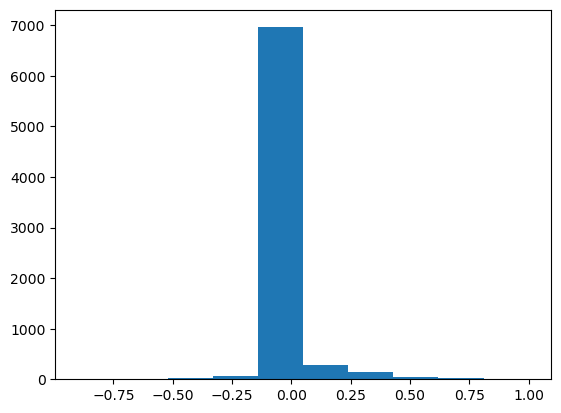

In [922]:
plt.hist(list(df['stance'].values))
plt.show()

In [928]:
_ = topic_analysis(df, True, 10)

KeyError: 'topic'

In [924]:
df_days = count_days_changed_stance_analysis(df)

Potrzeba średnio 38.592592592592595 dni na zmianę poglądów


## sejm keywords

In [925]:
sejm_keywords_path = 'dane/done/sejm_topic/'

main_df = pd.NA
if os.path.exists(sejm_keywords_path) and os.path.isdir(sejm_keywords_path):
    df_files_list = [file for file in os.listdir(sejm_keywords_path) if os.path.isfile(os.path.join(sejm_keywords_path, file))]
    for df_file in df_files_list:
        file_path = sejm_keywords_path + '/' + df_file
        df = pd.read_pickle(file_path)
        if main_df is pd.NA:
            main_df = df
        else:
            main_df = pd.concat([main_df, df], ignore_index=True)
else:
    print(f'no files in {sejm_keywords_path}')
    
main_df.rename(columns={"topic_keywords": "topic"}, inplace=True)
                

main_df.to_pickle('dane/done/df_sejm_keywords_all.pkl')

In [859]:
df, data_with_changed_stance, data_with_no_changed_stance = stance_analysis('df_sejm_keywords_all', False)
topics_with_changed_stance = data_with_changed_stance['topic'].unique()

Liczba tematów, w których wystąpiła zmienność nastawienia: 22
Liczba autorów, którzy zmienili nastawienie do tematu: 209


count    276737.000000
mean          0.024777
std           0.135277
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: stance, dtype: float64

,topic,count
13,rząd pis (prawo i sprawiedliwość),30344
7,opozycja,16613
18,współpraca z Unią Europejską,9772
11,publiczna opieka zdrowotna (nfz),4513
2,dotacje dla rolników,3114


,author,count
197,marszałek sejmu,4184
128,mirosław suchoń,2940
65,jan szopiński,2598
207,prezes rady ministrów mateusz morawiecki,1769
117,małgorzata gosiewska,1636


,topic,count
15,rząd pis (prawo i sprawiedliwość),16769
7,opozycja,8977
20,współpraca z Unią Europejską,8433
18,trybunał konstytucyjny,7739
2,dotacje dla rolników,7415


In [860]:
_ = topic_analysis(df, True, 20)

,author,count_topics
977,mirosław suchoń,23
709,katarzyna kretkowska,22
539,jan szopiński,22
768,krzysztof bosak,22
710,katarzyna lubnauer,21
982,monika rosa,21
409,hanna gill-piątek,21
557,janusz korwin-mikke,21
753,klaudia jachira,21
306,dobromir sośnierz,21


In [861]:
count_days_changed_stance_analysis(df)

Potrzeba średnio 151.6109979633401 dni na zmianę poglądów


,date,topic,author,mean_stance,count_days
0,2020-02-12,opozycja,adrian zandberg,0.000000,<NA>
1,2020-02-13,opozycja,adrian zandberg,0.000000,<NA>
2,2020-04-29,opozycja,adrian zandberg,0.400000,77
3,2020-05-05,opozycja,adrian zandberg,0.000000,6
4,2020-05-27,opozycja,adrian zandberg,0.066667,22
...,...,...,...,...,...
12739,2022-04-27,współpraca z Unią Europejską,"prezes rady ministrów, minister aktywów państw...",0.000000,14
12740,2022-05-25,współpraca z Unią Europejską,"prezes rady ministrów, minister aktywów państw...",0.000000,<NA>
12741,2022-06-22,współpraca z Unią Europejską,"prezes rady ministrów, minister aktywów państw...",0.000000,<NA>
12742,2022-07-20,współpraca z Unią Europejską,"prezes rady ministrów, minister aktywów państw...",0.000000,<NA>


---

## Twitter

### chat only

In [863]:
data_tweets = pd.read_pickle('dane/done/tweets_chat_only_cleaned.pkl')
tweets_all = pd.read_pickle("dane/done/tweets_with_sentiment_updated.pkl")

tweets_all = tweets_all[['tweet_id', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'sentiment_herbert', 'date']]
merged_df_tweets = pd.merge(tweets_all, data_tweets, how='inner', on='tweet_id')
merged_df_tweets['stance'] = 0

merged_df_tweets.to_pickle('dane/done/merged_tweets_chat_only.pkl')

In [864]:
data_tweets_chat_only, _, _ = stance_analysis('merged_tweets_chat_only', True)
count_days_changed_stance_analysis(data_tweets_chat_only)

Index(['tweet_id', 'TextBlob_Subjectivity', 'TextBlob_Polarity',
       'sentiment_herbert', 'date', 'author', 'text_all', 'openai_result',
       'text', 'topic', 'sentiment', 'stance'],
      dtype='object')
Liczba tematów, w których wystąpiła zmienność nastawienia: 3
Liczba autorów, którzy zmienili nastawienie do tematu: 3


/var/folders/4k/8js3jm9n457cm4_v631zyrkw0000gn/T/ipykernel_1158/704908357.py:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



count    2089.000000
mean        0.006176
std         0.098207
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stance, dtype: float64

,topic,count
2,rząd pis (prawo i sprawiedliwość),366
0,opozycja,258
1,przyjmowanie imigrantów,13


,author,count
2,szymon_holownia,261
1,sjkaleta,216
0,pawelbejda,160


,topic,count
13,rząd pis (prawo i sprawiedliwość),132
6,opozycja,131
16,współpraca z Unią Europejską,93
1,dotacje dla rolników,69
10,przyjmowanie imigrantów,65


Potrzeba średnio 31.421875 dni na zmianę poglądów


,date,topic,author,mean_stance,count_days
0,2023-02-16 06:22:00,rząd pis (prawo i sprawiedliwość),pawelbejda,0.0,NaN
1,2023-03-08 14:07:00,rząd pis (prawo i sprawiedliwość),pawelbejda,0.0,NaN
2,2023-03-20 18:55:00,rząd pis (prawo i sprawiedliwość),pawelbejda,0.0,NaN
3,2023-03-24 08:11:00,rząd pis (prawo i sprawiedliwość),pawelbejda,0.0,NaN
4,2023-03-25 11:35:00,rząd pis (prawo i sprawiedliwość),pawelbejda,0.0,NaN
...,...,...,...,...,...
515,2023-10-04 07:05:00,rząd pis (prawo i sprawiedliwość),szymon_holownia,0.0,NaN
516,2023-10-06 10:09:00,rząd pis (prawo i sprawiedliwość),szymon_holownia,0.0,NaN
517,2023-10-11 06:56:00,rząd pis (prawo i sprawiedliwość),szymon_holownia,0.0,NaN
518,2023-10-13 17:58:00,rząd pis (prawo i sprawiedliwość),szymon_holownia,0.0,NaN


### correct and cut

In [865]:
data_tweets = pd.read_pickle('dane/done/tweets_correct_and_cut.pkl')
tweets_all = pd.read_pickle("dane/done/tweets_with_sentiment_updated.pkl")

tweets_all = tweets_all[['tweet_id', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'sentiment_herbert', 'date']]
merged_df_tweets = pd.merge(tweets_all, data_tweets, how='inner', on='tweet_id')
merged_df_tweets['stance'] = 0

merged_df_tweets.to_pickle('dane/done/merged_tweets_correct_and_cut.pkl')

data_tweets_correct, _, _ = stance_analysis('merged_tweets_correct_and_cut', True)

count_days_changed_stance_analysis(data_tweets_correct)

Index(['tweet_id', 'TextBlob_Subjectivity', 'TextBlob_Polarity',
       'sentiment_herbert', 'date', 'author', 'text_all', 'openai_result',
       'text', 'topic', 'sentiment', 'stance'],
      dtype='object')
Liczba tematów, w których wystąpiła zmienność nastawienia: 1
Liczba autorów, którzy zmienili nastawienie do tematu: 1


/var/folders/4k/8js3jm9n457cm4_v631zyrkw0000gn/T/ipykernel_1158/704908357.py:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



count    670.000000
mean       0.005647
std        0.092088
min       -0.666667
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: stance, dtype: float64

,topic,count
0,publiczna opieka zdrowotna (nfz),72


,author,count
0,a_niedzielski,72


,topic,count
10,rząd pis (prawo i sprawiedliwość),156
5,opozycja,100
15,wzmocnienie wojska polskiego,35
7,przyjmowanie imigrantów,21
14,współpraca z Unią Europejską,14


Potrzeba średnio 34.0 dni na zmianę poglądów


,date,topic,author,mean_stance,count_days
0,2022-09-23 07:10:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
1,2022-10-03 15:02:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
2,2022-10-19 05:36:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
3,2022-10-22 06:28:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
4,2022-10-29 14:19:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
...,...,...,...,...,...
65,2023-07-28 16:32:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
66,2023-08-01 08:30:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
67,2023-08-04 09:42:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
68,2023-08-04 14:36:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN


In [866]:
_ = topic_analysis(data_tweets_correct, 'username', 5)

,author,count_topics
7,czarnecki_pis,11
38,szymon_holownia,10
0,a_niedzielski,9
4,beatamk,9
26,pawelbejda,8
3,bbudka,7
34,sjkaleta,7
31,pomaska,7
32,radekfogiel,6
30,pkukiz,6


In [926]:
data_tweets_correct, _, _ = stance_analysis('merged_tweets_correct_and_cut', False)

count_days_changed_stance_analysis(data_tweets_correct)

Index(['tweet_id', 'TextBlob_Subjectivity', 'TextBlob_Polarity',
       'sentiment_herbert', 'date', 'author', 'text_all', 'openai_result',
       'text', 'topic', 'sentiment', 'stance'],
      dtype='object')
Liczba tematów, w których wystąpiła zmienność nastawienia: 1
Liczba autorów, którzy zmienili nastawienie do tematu: 1


/var/folders/4k/8js3jm9n457cm4_v631zyrkw0000gn/T/ipykernel_1158/704908357.py:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



count    670.000000
mean       0.007006
std        0.112017
min       -0.781250
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: stance, dtype: float64

,topic,count
0,publiczna opieka zdrowotna (nfz),72


,author,count
0,a_niedzielski,72


,topic,count
10,rząd pis (prawo i sprawiedliwość),156
5,opozycja,100
15,wzmocnienie wojska polskiego,35
14,współpraca z Unią Europejską,23
7,przyjmowanie imigrantów,21


Potrzeba średnio 45.5 dni na zmianę poglądów


,date,topic,author,mean_stance,count_days
0,2022-09-23 07:10:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
1,2022-10-03 15:02:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
2,2022-10-19 05:36:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
3,2022-10-22 06:28:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
4,2022-10-29 14:19:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
...,...,...,...,...,...
65,2023-07-28 16:32:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
66,2023-08-01 08:30:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
67,2023-08-04 09:42:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
68,2023-08-04 14:36:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN


### keywords

In [867]:
data_tweets = pd.read_pickle('dane/done/tweets_anotated_keyword_based_w10_step8.pkl')
tweets_all = pd.read_pickle("dane/done/tweets_with_sentiment_updated.pkl")

tweets_all = tweets_all[['tweet_id', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'sentiment_herbert', 'date']]
merged_df_tweets = pd.merge(tweets_all, data_tweets, how='inner', on='tweet_id')
merged_df_tweets['stance'] = 0

merged_df_tweets.rename(columns={"topic_keywords": "topic"}, inplace=True)

merged_df_tweets.to_pickle('dane/done/merged_tweets_keywords.pkl')

data_tweets_keywords, _, _ = stance_analysis('merged_tweets_keywords')
count_days_changed_stance_analysis(data_tweets_keywords)

Index(['tweet_id', 'TextBlob_Subjectivity', 'TextBlob_Polarity',
       'sentiment_herbert', 'date', 'author', 'text_all', 'text', 'topic',
       'stance'],
      dtype='object')
Liczba tematów, w których wystąpiła zmienność nastawienia: 5
Liczba autorów, którzy zmienili nastawienie do tematu: 9


/var/folders/4k/8js3jm9n457cm4_v631zyrkw0000gn/T/ipykernel_1158/704908357.py:31: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.78125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



count    8719.000000
mean        0.001340
std         0.095309
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stance, dtype: float64

,topic,count
3,rząd pis (prawo i sprawiedliwość),587
4,wzmocnienie wojska polskiego,393
1,opozycja,278
2,publiczna opieka zdrowotna (nfz),64
0,dotacje dla rolników,12


,author,count
5,pawelbejda,399
1,m_gdula,329
7,szymon_holownia,215
3,mblaszczak,135
8,trzaskowski_,82


,topic,count
15,rząd pis (prawo i sprawiedliwość),1166
6,opozycja,946
20,współpraca z Unią Europejską,400
13,publiczna opieka zdrowotna (nfz),316
12,przyjmowanie imigrantów,219


Potrzeba średnio 78.17283950617283 dni na zmianę poglądów


,date,topic,author,mean_stance,count_days
0,2022-10-03 15:02:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
1,2022-10-06 09:48:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
2,2022-10-19 19:24:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
3,2022-10-29 14:19:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
4,2022-11-11 11:12:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
...,...,...,...,...,...
962,2023-10-09 10:54:00,rząd pis (prawo i sprawiedliwość),trzaskowski_,0.0,NaN
963,2023-10-11 08:05:00,rząd pis (prawo i sprawiedliwość),trzaskowski_,0.0,NaN
964,2023-10-12 10:47:00,rząd pis (prawo i sprawiedliwość),trzaskowski_,0.0,NaN
965,2023-10-12 19:04:00,rząd pis (prawo i sprawiedliwość),trzaskowski_,0.0,NaN


In [868]:
_ = topic_analysis(data_tweets_keywords, False, 1)

,author,count_topics
80,sjkaleta,18
83,styszka,17
66,partiarazem,17
0,_mkonieczny,16
10,beatamk,16
...,...,...
20,elz_zielinska,1
35,jerzymaterna,1
12,c_grabarczyk,1
63,mswitczak,1


### tweets all

In [870]:
data_tweets_chat_only_cut = data_tweets_chat_only[['tweet_id', 'date', 'author', 'topic', 'sentiment_herbert',
                                              'stance', 'diff_max_min_stance','stance_changed']]

data_tweets_keywords_cut = data_tweets_keywords[['tweet_id', 'date', 'author', 'topic', 'sentiment_herbert',
                                              'stance', 'diff_max_min_stance','stance_changed']]

data_tweets_correct_cut = data_tweets_correct[['tweet_id', 'date', 'author', 'topic', 'sentiment_herbert',
                                              'stance', 'diff_max_min_stance','stance_changed']]

data_tweets_all = pd.concat([data_tweets_chat_only_cut, data_tweets_keywords_cut, data_tweets_correct_cut], axis=0)

In [871]:
data_tweets_all.to_pickle('dane/done/tweets_all.pkl')

In [872]:
df, _, _ = stance_analysis('tweets_all', sentiment_column_name='sentiment_herbert', stance_detected=True)
count_days_changed_stance_analysis(df)

Liczba tematów, w których wystąpiła zmienność nastawienia: 6
Liczba autorów, którzy zmienili nastawienie do tematu: 9


count    11478.000000
mean         0.002472
std          0.095672
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: stance, dtype: float64

,topic,count
4,rząd pis (prawo i sprawiedliwość),953
1,opozycja,536
5,wzmocnienie wojska polskiego,393
3,publiczna opieka zdrowotna (nfz),136
2,przyjmowanie imigrantów,13


,author,count
5,pawelbejda,559
7,szymon_holownia,476
1,m_gdula,329
6,sjkaleta,241
0,a_niedzielski,136


,topic,count
16,rząd pis (prawo i sprawiedliwość),1454
7,opozycja,1177
21,współpraca z Unią Europejską,507
14,publiczna opieka zdrowotna (nfz),358
13,przyjmowanie imigrantów,305


Potrzeba średnio 50.486301369863014 dni na zmianę poglądów


,date,topic,author,mean_stance,count_days
0,2022-09-23 07:10:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
1,2022-10-03 15:02:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
2,2022-10-06 09:48:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
3,2022-10-19 05:36:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
4,2022-10-19 19:24:00,publiczna opieka zdrowotna (nfz),a_niedzielski,0.0,NaN
...,...,...,...,...,...
1459,2023-10-09 10:54:00,rząd pis (prawo i sprawiedliwość),trzaskowski_,0.0,NaN
1460,2023-10-11 08:05:00,rząd pis (prawo i sprawiedliwość),trzaskowski_,0.0,NaN
1461,2023-10-12 10:47:00,rząd pis (prawo i sprawiedliwość),trzaskowski_,0.0,NaN
1462,2023-10-12 19:04:00,rząd pis (prawo i sprawiedliwość),trzaskowski_,0.0,NaN


In [747]:
_ = topic_analysis(df, False, 10)

,author,count_topics
81,sjkaleta,21
10,beatamk,21
86,szymon_holownia,20
65,mwojcik_,18
2,a_niedzielski,17
87,trzaskowski_,17
84,styszka,17
68,pawelbejda,17
67,partiarazem,17
59,michaldworczyk,17


## Herbert

### herbert cut and correct

In [927]:
data_tweets_herbert = pd.read_pickle('dane/done/herbert_tweets_correct_and_cut.pkl')
data_tweets_herbert['stance'] = data_tweets_herbert['stance'].replace({'NEITHER': 0,
                                        'FAVOR': 1,
                                        'AGAINST': -1,
                                        })
data_tweets_herbert.rename(columns={'stance' : 'sentiment_herbert'}, inplace=True)


tweets_all = tweets_all[['tweet_id', 'TextBlob_Subjectivity', 'date']]
merged_df_tweets_herbert_correct = pd.merge(tweets_all, data_tweets_herbert, how='inner', on='tweet_id')

merged_df_tweets_herbert_correct.to_pickle('dane/done/merged_df_tweets_herbert_correct.pkl')


data_tweets_correct_herbert , _, _ = stance_analysis('merged_df_tweets_herbert_correct', False)



count_days_changed_stance_analysis(data_tweets_correct_herbert)

Index(['tweet_id', 'TextBlob_Subjectivity', 'date', 'author', 'text_all',
       'openai_result', 'text', 'topic', 'sentiment', 'sentiment_herbert',
       'score'],
      dtype='object')
Liczba tematów, w których wystąpiła zmienność nastawienia: 3
Liczba autorów, którzy zmienili nastawienie do tematu: 3


count    570.000000
mean       0.006078
std        0.114304
min       -1.000000
25%        0.000000
50%       -0.000000
75%        0.000000
max        1.000000
Name: stance, dtype: float64

,topic,count
2,wzmocnienie wojska polskiego,31
1,współpraca z Unią Europejską,10
0,rząd pis (prawo i sprawiedliwość),4


,author,count
1,pawelbejda,31
0,mblaszczak,10
2,pkukiz,4


,topic,count
10,rząd pis (prawo i sprawiedliwość),166
5,opozycja,89
15,wzmocnienie wojska polskiego,35
7,przyjmowanie imigrantów,18
14,współpraca z Unią Europejską,14


Potrzeba średnio 18.615384615384617 dni na zmianę poglądów


,date,topic,author,mean_stance,count_days
0,2023-06-24 19:50:00,współpraca z Unią Europejską,mblaszczak,0.000000,<NA>
1,2023-09-14 08:13:00,współpraca z Unią Europejską,mblaszczak,0.633333,81
2,2023-10-03 09:28:00,współpraca z Unią Europejską,mblaszczak,-0.125000,19
3,2023-10-13 08:05:00,współpraca z Unią Europejską,mblaszczak,0.000000,9
4,2023-10-27 06:49:00,współpraca z Unią Europejską,mblaszczak,0.000000,<NA>
5,2023-10-31 08:03:00,współpraca z Unią Europejską,mblaszczak,0.000000,<NA>
6,2023-01-19 18:25:00,wzmocnienie wojska polskiego,pawelbejda,0.000000,<NA>
7,2023-01-23 17:36:00,wzmocnienie wojska polskiego,pawelbejda,0.000000,<NA>
8,2023-01-28 13:00:00,wzmocnienie wojska polskiego,pawelbejda,0.000000,<NA>
9,2023-01-28 14:54:00,wzmocnienie wojska polskiego,pawelbejda,0.000000,<NA>


In [ ]:
data_tweets_herbert = pd.read_pickle('dane/done/tweets_correct_and_cut.pkl')
tweets_all = pd.read_pickle("dane/done/tweets_with_sentiment_updated.pkl")

tweets_all = tweets_all[['tweet_id', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'sentiment_herbert', 'date']]
merged_df_tweets = pd.merge(tweets_all, data_tweets, how='inner', on='tweet_id')
merged_df_tweets['stance'] = 0

merged_df_tweets.to_pickle('dane/done/merged_tweets_correct_and_cut.pkl')

data_tweets_correct, _, _ = stance_analysis('merged_tweets_correct_and_cut', True)

count_days_changed_stance_analysis(data_tweets_correct)

In [ ]:
_ = topic_analysis(data_tweets_correct, 'username', 5)